# Logistic Regression

## Case study - Term deposit prediction
This example demonstrates how to build a linear regression model on a term deposit dataset.

## Getting Started

In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv("heart-disease.csv")          # Read data file
df.head()                                     # Show the first samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data description

**Data Feature**
* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood
glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight
without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or
depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the
ECG plot)
* slope: the slope of the peak exercise ST segment
 * 0: downsloping
 * 1: flat
 * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
 * Value 0: NULL (dropped from the dataset previously
 * Value 1: fixed defect (no blood flow in some part of the heart)
 * Value 2: normal blood flow
 * Value 3: reversible defect (a blood flow is observed but
it is not normal)


**Data Label**
* target: Heart disease (1 = no, 0= yes)

### Data info

In [42]:
df.info()          # Show dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


We can see that the data values are already in all numerical values. Therefore, we do not need to encode any feature.

In [43]:
df.describe() #describe the entire dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Cleaning data

In [44]:
#checking the null data in the dataset
null_data = df.isnull().sum()
null_data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no null data

In [45]:
df.drop_duplicates() #drop duplicates
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


##Exploratory Data Analysis

In [46]:
print("Columns") #get the names of all columns
columns = df.describe().columns
print(columns)

Columns
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecf97ef490>,
      dtype=object)

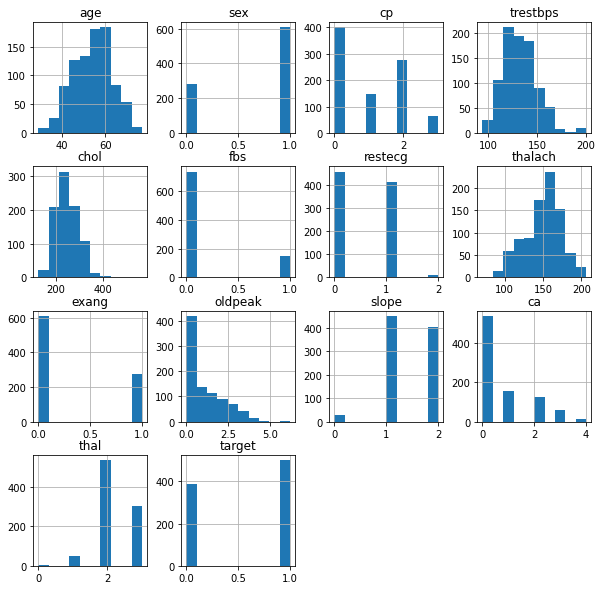

In [47]:
df.hist(column=columns, figsize=(10, 10))          # plot histogram of all columns, by default bin=10

Base on the Data description and histograms above, the data seems quite clean

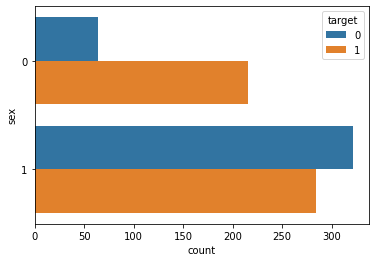

In [48]:
sns.countplot(y="sex", data=df, hue="target")          # Countplot with an additional variable target, using 'hue' parameter to split counts in to category target.

We can see that for female(0), less females have heart diseases compared to male(1).

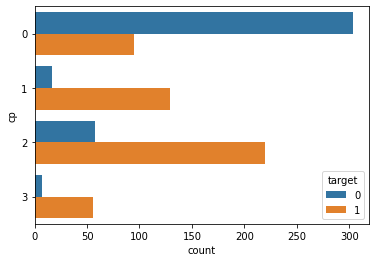

In [49]:
sns.countplot(y="cp", data=df, hue="target") #countplot for cp - chest pain

People who suffer from asymptomatic chest pain are more likely to have heart diseases than the other 3 types

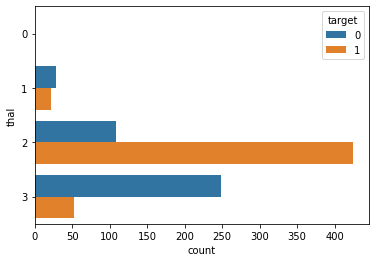

In [50]:
sns.countplot(y="thal", data=df, hue="target")

The chart above suggests that people with reverible defect(3) is likely to have heart diseases. Also, the chart shows that people with normal blood flow(2) can also may have heart diseases.

## Model training

In [51]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Pre-process the data

In [52]:
columns = columns.tolist()
columns.remove('target') #remove label y column
feature_data = df[columns] # Assign a variable to features x, including all columns except 'target'
label_data = df.target # Assign 'target' to label y

In [56]:
label_data = label_data.to_numpy() #turn the series to numpy array
print("Before reshaping: " + str(label_data.shape))           # One-dimensional array 
label_data = label_data.reshape(-1, 1)                                 # Reshape to two-dimensional array. This is requirement of scikit-learn library.
print("After reshaping: " + str(label_data.shape))

Before reshaping: (886,)
After reshaping: (886, 1)


In [57]:
# Split the dataset to training and testing, ratio 70:30.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.3, random_state=101)         # Train-test split with fixed random state

print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (620, 13)
y_train: (620, 1)
X_test: (266, 13)
y_test: (266, 1)


In [58]:
#Scale dataset
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
X_train_scaler = scaler.fit_transform(X_train)       # Fit (compute mean and std), then transform training data using these values.
X_test_scaler = scaler.transform(X_test)             # ONLY transform test data, using mean and std of training data

### build model

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(X_train_scaler, y_train.reshape(-1))  # Train the model

LogisticRegression()

In [62]:
# Calculate test accuracy
logmodel.score(X_test_scaler, y_test)

0.9285714285714286

In [63]:
# Calculate prediction labels
predictions = logmodel.predict(X_test_scaler)                # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe 
print(final_prediction)

     target
0         0
1         1
2         0
3         0
4         1
..      ...
261       0
262       0
263       0
264       1
265       0

[266 rows x 1 columns]


### evaluation

In [64]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.9607843137254902
Recall:  0.91875
F1:  0.939297124600639
Confusion matrix: 
 [[100   6]
 [ 13 147]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       106
           1       0.96      0.92      0.94       160

    accuracy                           0.93       266
   macro avg       0.92      0.93      0.93       266
weighted avg       0.93      0.93      0.93       266

